# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [52]:
choco = pd.read_csv('../data/01-chocolate-bar/chocolate.csv')

In [53]:
choco.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [54]:
choco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [55]:
choco.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [56]:
choco.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [57]:
original_colnames = choco.columns
new_colnames = ['company', 'species', 'REF', 'review_year', 'cocoa_percent',
                'company_location', 'rating', 'bean_type', 'country']
choco = choco.rename(columns=dict(zip(original_colnames, new_colnames)))

choco['cocoa_percent'] = choco['cocoa_percent'].str.replace('%', '').astype(float)/100
choco.head()

,company,species,REF,review_year,cocoa_percent,company_location,rating,bean_type,country
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [58]:
choco.describe()

,REF,review_year,cocoa_percent,rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,0.716983,3.185933
std,552.886365,2.927210,0.063231,0.478062
min,5.000000,2006.000000,0.420000,1.000000
25%,576.000000,2010.000000,0.700000,2.875000
50%,1069.000000,2013.000000,0.700000,3.250000
75%,1502.000000,2015.000000,0.750000,3.500000
max,1952.000000,2017.000000,1.000000,5.000000


In [59]:
choco['species'].value_counts().head(10)

Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Sambirano             19
Chuao                 19
Ocumare               17
Ghana                 15
Papua New Guinea      15
Name: species, dtype: int64

In [12]:
choco['country'].isnull().value_counts()

False    1794
True        1
Name: country, dtype: int64

In [13]:
## Replace origin country
choco['country'] = choco['country'].fillna(choco['species'])
choco['country'].isnull().value_counts()

False    1795
Name: country, dtype: int64

In [14]:
## Look at most frequent origin countries
choco['country'].value_counts().head(10)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            146
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: country, dtype: int64

In [15]:
## Wee see that a lot of countries have ' ' value - means that this is 100% blend. Let's look at this
choco[choco['country'].str.len()==1]['species'].unique()

array(['Nine', 'Toscano Black', 'Houseblend', 'Nature', 'Organic Dark',
       'One Hundred', 'Blend', 'Lago di Como, Blu', 'Blend No. 1',
       'Philly Blend, 5 plantations', 'Kendari', 'Tarakan', 'Maragda',
       'Sensations Intense', 'Zorzal Reserva, 2015 H., Kerchner', 'Noir',
       'Ilblend', 'Red Vanilla', 'Supremo- SF', 'Dark',
       'Epique, Blend No. 49', 'Coucher du Soleil', 'Lever du Soleil',
       'Onyx', 'Nocturne', 'Complexite', 'Special Maker Reserve',
       'Quetzalcoatl', 'Tsaranta', 'Semisweet', 'Campesino w/ nibs',
       'Trinitario', 'Downtown London', 'Africa meets Latina', 'Amazonas',
       'one hundred', 'Kuruba', 'Orinoco', 'Excellence (US Version)',
       'Cacao Nib Crunch', 'Brooklyn Blend', 'Carre Amer',
       'Carre Grand Noir', 'Noir Infini',
       'Grand Cru Blend No.1, 5 yr. Anniversary Ed', 'Signature Blend',
       'Raw', 'Mid Mountain, 2014', '100 percent', 'Latino', 'Nibby',
       'Extra Dark', 'Bittersweet', 'Wasatch', "Chef's Blend",
   

In [18]:
## Is there another way to determine blends?
choco[choco['species'].str.contains(',')]['species'].nunique()

533

In [19]:
## Is there any misspelling/reduction?
choco['country'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 'Per

In [20]:
import re

In [21]:
## Text preparation (correction) func
def txt_prep(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

In [22]:
choco['country'].str.replace('.', '').apply(txt_prep).unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', ' ', 'Jamaica', 'Grenada',
       'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Congo',
       'Philippines', 'Malaysia', 'Dominican Republic,Bali',
       'Venezuela,Africa,Brasil,Peru,Mexico', 'Gabon', 'Ivory Coast',
       'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda', 'Martinique',
       'Sao Tome,Principe', 'Vanuatu', 'Australia', 'Liberia',
       'Ecuador,Costa Rica', 'West Africa', 'Hawaii', 'St Lucia',
       'Costa Rica,Venezuela', 'Peru,Madagascar', 'Venezuela,Trinidad',
       'Trinidad,Tobago', 'Venezuela,Trinidad,Ecuador',
       'South America,Africa', 'India',
       'Africa,Carribean,Central America', 'Tobago',
       'Venezuela,Indonesia,Ecuador', 'Peru,Ecuador,Ven

In [23]:
## Replace country feature
choco['country'] = choco['country'].str.replace('.', '').apply(txt_prep)

In [24]:
## Looks better
choco['country'].value_counts().tail(10)

South America,Africa                             1
Venezuela,Bolivia,Dominican Republic             1
Suriname                                         1
Trinidad,Ecuador                                 1
Venezuela,Trinidad,Ecuador                       1
Venezuela,Dominican Republic                     1
Carribean,Dominican Republic,Jamaica,Trinidad    1
Peru,Ecuador,Venezuela                           1
Cameroon                                         1
Peru,Madagascar,Dominican Republic               1
Name: country, dtype: int64

In [25]:
## How many countries may contain in Blend?
(choco['country'].str.count(',')+1).value_counts()

1    1739
2      38
3      12
5       3
4       3
Name: country, dtype: int64

In [26]:
## Is there any misspelling/reduction in company location?
choco['company_location'].sort_values().unique()

array(['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador',
       'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana',
       'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [27]:
## We need to make some replacements
choco['company_location'] = choco['company_location']\
.str.replace('Amsterdam', 'Holland')\
.str.replace('U.K.', 'England')\
.str.replace('Niacragua', 'Nicaragua')\
.str.replace('Domincan Republic', 'Dominican Republic')

choco['company_location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'England', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Holland', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lithuania', 'Madagascar', 'Martinique', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland',
       'Singapore', 'South Africa', 'South Korea', 'Spain', 'St. Lucia',
       'Suriname', 'Sweden', 'Switzerland', 'U.S.A.', 'Venezuela',
       'Vietnam', 'Wales'], dtype=object)

In [28]:
## Is there any misspelling/reduction in company name?
choco['company'].str.lower().sort_values().nunique() == choco['company'].sort_values().nunique()

True

In [29]:
## Let's define blend feature
choco['is_blend'] = np.where(
    np.logical_or(
        np.logical_or(choco['species'].str.lower().str.contains(',|(blend)|;'),
                      choco['country'].str.len() == 1),
        choco['country'].str.lower().str.contains(',')
    )
    , 1
    , 0
)
## How many blends/pure cocoa?
choco['is_blend'].value_counts()

0    1096
1     699
Name: is_blend, dtype: int64

In [30]:
## Look at 5 blends/pure rows
choco.groupby('is_blend').head(5)

,company,species,REF,review_year,cocoa_p,company_location,rating,bean_typ,country,is_blend
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,0
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,0
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,0
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,0
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,0
23,Acalli,"Chulucanas, El Platanal",1462,2015,0.70,U.S.A.,3.75,,Peru,1
24,Acalli,"Tumbes, Norandino",1470,2015,0.70,U.S.A.,3.75,Criollo,Peru,1
26,Adi,"Vanua Levu, Toto-A",705,2011,0.80,Fiji,3.25,Trinitario,Fiji,1
28,Adi,"Vanua Levu, Ami-Ami-CA",705,2011,0.72,Fiji,3.50,Trinitario,Fiji,1
29,Aequare (Gianduja),"Los Rios, Quevedo, Arriba",370,2009,0.55,Ecuador,2.75,Forastero (Arriba),Ecuador,1


In [31]:
## Define domestic feature
choco['is_domestic'] = np.where(choco['country'] == choco['company_location'], 1, 0)
choco['is_domestic'].value_counts()

0    1590
1     205
Name: is_domestic, dtype: int64

In [32]:
#Don't forget to add '.csv' at the end of the path
export_csv = choco.to_csv (r'../data/01-chocolate-bar/export_dataframe.csv', index = None, header=True) 

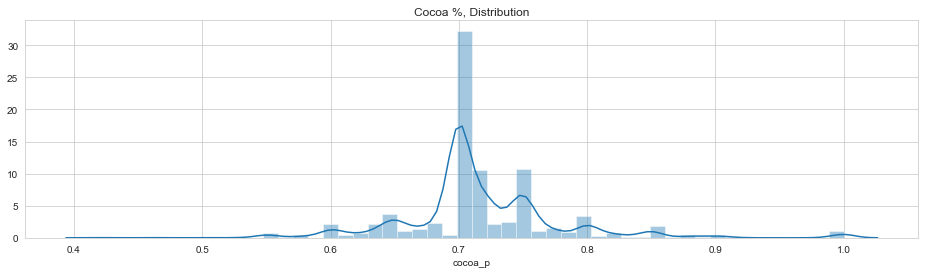

In [33]:
## Look at distribution of Cocoa %
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(choco['cocoa_p'], ax=ax)
ax.set_title('Cocoa %, Distribution')
plt.show()

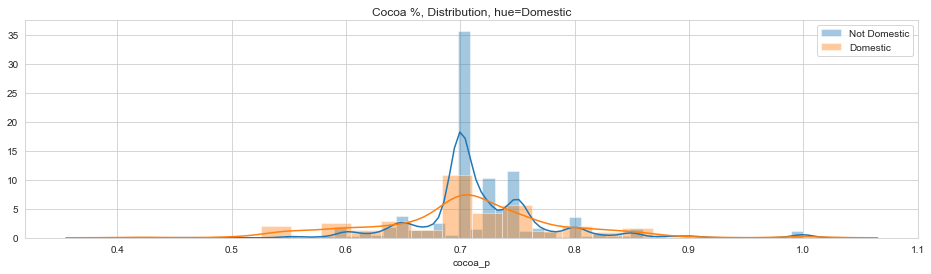

In [34]:
## Look at distribution of rating
fig, ax = plt.subplots(figsize=[16,4])
for i, c in choco.groupby('is_domestic'):
    sns.distplot(c['cocoa_p'], ax=ax, label=['Not Domestic', 'Domestic'][i])
ax.set_title('Cocoa %, Distribution, hue=Domestic')
ax.legend()
plt.show()

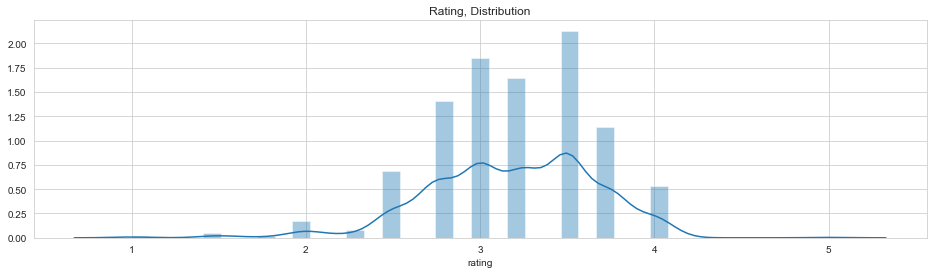

In [35]:
## Look at distribution of rating
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(choco['rating'], ax=ax)
ax.set_title('Rating, Distribution')
plt.show()

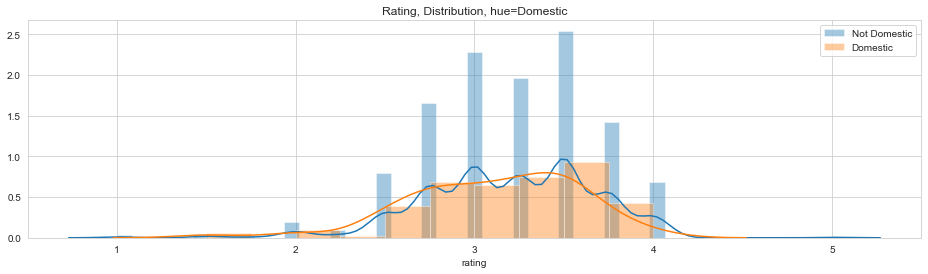

In [36]:
## Look at distribution of rating
fig, ax = plt.subplots(figsize=[16,4])
for i, c in choco.groupby('is_domestic'):
    sns.distplot(c['rating'], ax=ax, label=['Not Domestic', 'Domestic'][i])
ax.set_title('Rating, Distribution, hue=Domestic')
ax.legend()
plt.show()

Text(0.5, 1.0, 'Boxplot, Rating by Domestic')

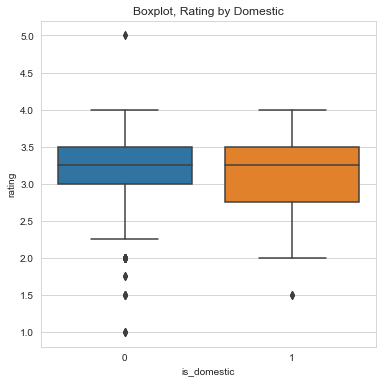

In [46]:
## What better? Domestic Or not?
fig, ax = plt.subplots(figsize=[6, 6])
sns.boxplot(
    data=choco,
    x='is_domestic',
    y='rating',
)
ax.set_title('Boxplot, Rating by Domestic')

Text(0.5, 1.0, 'Boxplot, Rating by Blend/Pure')

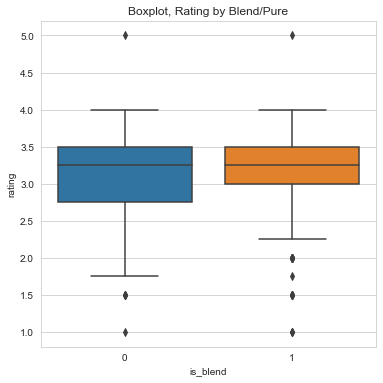

In [47]:
## What better? Pure or blend?
fig, ax = plt.subplots(figsize=[6, 6])
sns.boxplot(
    data=choco,
    x='is_blend',
    y='rating',
)
ax.set_title('Boxplot, Rating by Blend/Pure')

Text(0.5, 1, 'Goods Flow from origin to Company location, mean rating')

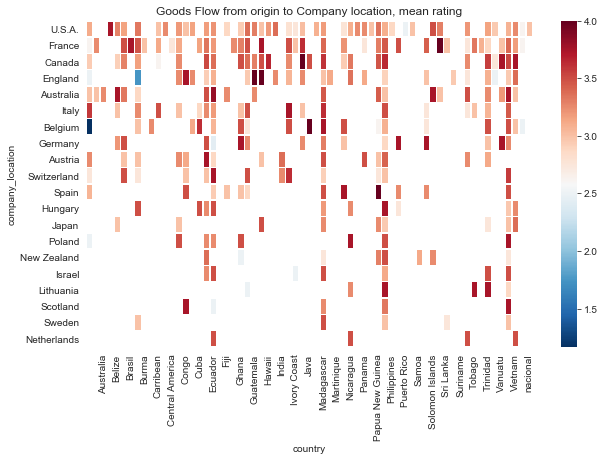

In [50]:
## What about quality(rating)
## Look at goodsflow
flow = pd.crosstab(
    choko_['company_location'],
    choko_['country'],
    choko_['rating'], aggfunc='mean'
)
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(flow.head(20), cmap='RdBu_r', linewidths=.5)
ax.set_title('Goods Flow from origin to Company location, mean rating')

Text(0.5, 1, 'Goods Flow from Company location, mean rating by years')

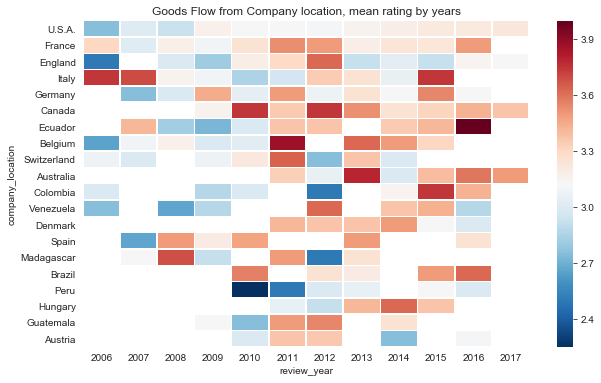

In [51]:
## What about quality(rating) is case of years
## Look at goodsflow
flow = pd.crosstab(
    choko_['company_location'],
    choko_['review_year'],
    choko_['rating'], aggfunc='mean'
)
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(flow.head(20), cmap='RdBu_r', linewidths=.5)
ax.set_title('Goods Flow from Company location, mean rating by years')